In [2]:
import os 
from pathlib import Path

import dotenv 
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
dotenv.load_dotenv()

True

In [3]:
DATA = Path(os.getenv('DATA'))
CONFIG = Path(os.getenv('CONFIG'))
cfg = OmegaConf.load(str(CONFIG/'volume/config.yaml'))

In [4]:
info = pd.read_csv(cfg.dataset.info).astype({'key': str, 'age': np.float64})
volume_predictions = pd.read_feather(DATA/'nako/processed/volume/predictions.feather').astype({'key': str})
df = info.join(volume_predictions.set_index('key'), on='key', how='inner')

In [5]:
select = ((df['age'] >= 60) & (df['sex'] == 1))

### Scaterplots

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5
colors = cm.get_cmap('tab10', 2)

No handles with labels found to put in legend.


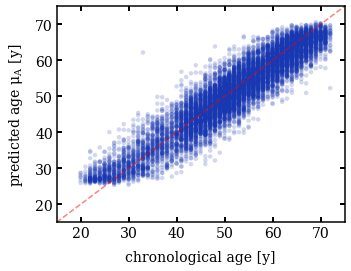

In [7]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(which='major', size=5, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=5, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
#ax.plot([1,5,8], [40,30,50], linewidth=2, label='Sample 1', color=colors(1))
ax.scatter(x=df['y'], y=df['y_hat0'], marker='o', color='#1837B2', s=20.0, alpha=0.2, edgecolors='none')
ax.plot([15, 75], [15,75], color='red', alpha=0.5, linestyle='dashed')
ax.set_xlim(15, 75)
ax.set_ylim(15, 75)
ax.set_xlabel('chronological age [y]', labelpad=10)
ax.set_ylabel('predicted age $\mathregular{\mu_A}$ [y]', labelpad=10)
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
plt.savefig('Final_Plot.pdf', dpi=600, transparent=False, bbox_inches='tight')

No handles with labels found to put in legend.


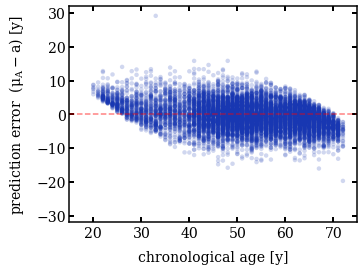

In [10]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(which='major', size=5, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=5, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.scatter(x=df['y'], y=df['y_hat0']-df['y'], marker='o', s=20.0, color='#1837B2', alpha=0.2, edgecolors='none')
ax.plot([15, 75], [0, 0], color='red', alpha=0.5, linestyle='dashed')
ax.set_xlim(15, 75)
ax.set_ylim(-32, 32)
ax.set_xlabel('chronological age [y]', labelpad=10)
ax.set_ylabel('prediction error  $\mathregular{(\mu_A - a)}$ [y]', labelpad=10)
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
plt.savefig('Final_Plot.pdf', dpi=600, transparent=False, bbox_inches='tight')

No handles with labels found to put in legend.


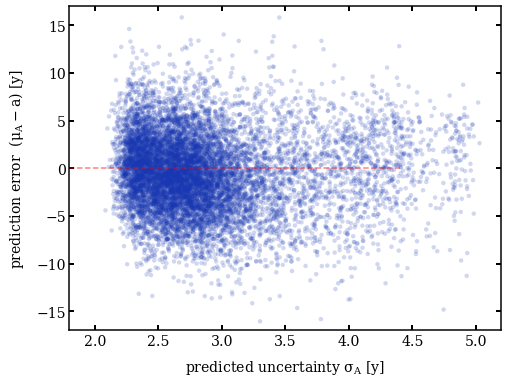

In [24]:
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_axes([0, 0, 1, 1])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(which='major', size=5, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=5, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
#ax.plot([1,5,8], [40,30,50], linewidth=2, label='Sample 1', color=colors(1))
ax.scatter(x=np.exp(df['y_hat1']), y=df['y_hat0']-df['y'], marker='o', s=20.0, color='#1837B2', alpha=0.2, edgecolors='none')
ax.plot([1.8, 4.4], [0, 0], color='red', alpha=0.5, linestyle='dashed')
ax.set_xlim(1.8, 5.2)
ax.set_ylim(-17, 17)
ax.set_xlabel('predicted uncertainty $\mathregular{\sigma_A}$ [y]', labelpad=10)
ax.set_ylabel('prediction error  $\mathregular{(\mu_A - a)}$ [y]', labelpad=10)
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
plt.savefig('Final_Plot.pdf', dpi=600, transparent=False, bbox_inches='tight')


No handles with labels found to put in legend.


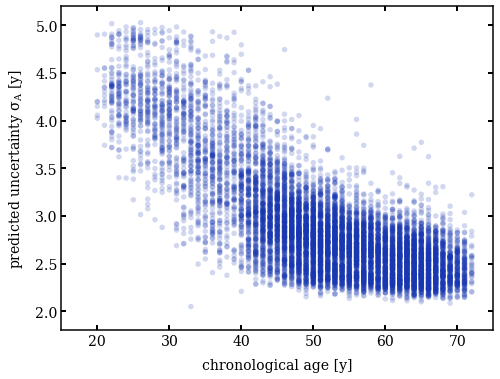

In [23]:
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_axes([0, 0, 1, 1])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(which='major', size=5, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=5, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
#ax.plot([1,5,8], [40,30,50], linewidth=2, label='Sample 1', color=colors(1))
ax.scatter(x=df['y'], y=np.exp(df['y_hat1']), marker='o', s=30.0, color='#1837B2', alpha=0.2, edgecolors='none')
ax.plot([15, 75], [0, 0], color='red', alpha=0.5, linestyle='dashed')
ax.set_xlim(15, 75)
ax.set_ylim(1.8, 5.2)
ax.set_xlabel('chronological age [y]', labelpad=10)
ax.set_ylabel(r'predicted uncertainty $\mathregular{\sigma_A}$ [y]', labelpad=10)
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
plt.savefig('Final_Plot.pdf', dpi=600, transparent=False, bbox_inches='tight')

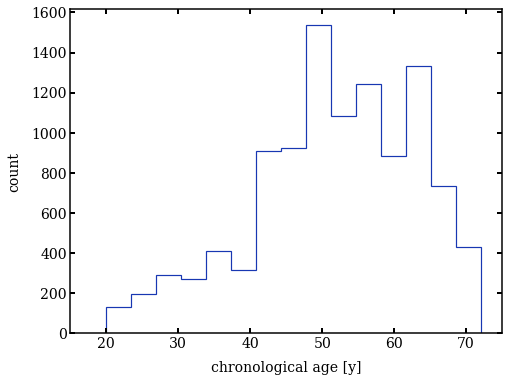

In [22]:
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=5, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=5, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.hist(df['y'],  bins=15, edgecolor='#1837B2', linewidth=1.2, histtype='step')
ax.set_xlim(15, 75)
ax.set_xlabel('chronological age [y]', labelpad=10)
ax.set_ylabel(r'count', labelpad=10)
plt.savefig('Final_Plot.pdf', dpi=600, transparent=False, bbox_inches='tight')